<a href="https://colab.research.google.com/github/takahashi0329/DeepLerarning2022Late/blob/main/CNN%E3%81%A7%E7%94%BB%E5%83%8F%E5%88%86%E9%A1%9E2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNNで画像分類
##CNNでCIFAR-10の画像データを訓練し、ネットなどの任意の画像を正しく分類できるかどうかを確認

##学習用のライブラリを読み込む

In [1]:
from keras.models import Sequential, Model
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import MaxPooling2D
from keras.layers import Dropout

#データセットと表示用ライブラリもimportする
##データセットはtensorflow内のCLFA-10

In [2]:
import tensorflow as tf #CLFAR10のために読み込む
from matplotlib import pyplot #グラフのプッロト表示
import numpy as np #データ計算
import cv2 # computer vison 画像を取り扱う

## CIFAR10を読み込む

In [3]:
cifar = tf.keras.datasets.cifar10

###CIFAR10からデータを読み込んで学習用とテスト検証用に振り分ける

In [4]:
(X_train, y_train), (x_test,y_test) = cifar.load_data() #データをロード

###CIFAR10の答え用キーワード（ラベル）の配列を用意

In [5]:
labels = ["飛行機","自動車","鳥","猫","鹿","犬","カエル","馬","船","トラック"]

##ロードしたデータを加工する

In [6]:
x_train = X_train.astype("float32") / 255 #データの値を255で割って学習用にする
x_test = x_test.astype("float32") / 255

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [8]:
# ロードしたデータの数を確認
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

50000
10000
50000
10000


##ダウンロードした画像を表示する

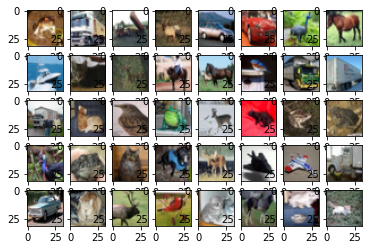

In [10]:
from PIL import Image
for i in range(0,40):
  im = Image.fromarray(X_train[i])
  pyplot.subplot(5, 8, i+1)
  pyplot.imshow(im)
  #繰り返し終わり
pyplot.show()

##CNNの学習モデルを組み立てていく

In [11]:
#層をたくさん追加するので、リストでまとめて追加する
num_classes = len(labels) #分類数
in_shape = (32, 32, 3)
model =Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=in_shape),
    tf.keras.layers.Activation('relu'),
    Conv2D(32, (3,3), padding='same'),
    tf.keras.layers.Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0,25),

    Conv2D(32, (3,3), padding='same'),
    tf.keras.layers.Activation('relu'),
    Conv2D(32, (3,3), padding='same'),
    tf.keras.layers.Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0,25),

    Flatten(),
    Dense(512),
    tf.keras.layers.Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    tf.keras.layers.Activation('softmax'),
])